In [2]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy
import pandas as pd
import numpy as np
!pip install piplite

E: Package 'libfluidsynth1' has no installation candidate
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 23.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement piplite (from versions: none)
ERROR: No matching distribution found for piplite


In [3]:
df=pd.read_csv('veriMadenSON.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 42
df=df.rename(columns={"Okul yemekhanesinin tatlı seçenekleri hakkında ne düşünüyorsunuz? (1: Çok kötü, 5: Mükemmel)":"Tatli_Secenek","Yemeklerin lezzeti hakkında ne düşünüyorsunuz? (1: Çok kötü, 5: Mükemmel))":"Lezzet","Okul yemekhanesinin uzaklığı sizi nasıl etkiliyor? (1: Çok olumsuz, 5: Hiç etkilemiyor)":"Uzaklik","Okul yemeklerinin fiyatları sizce uygun mu? (1: Çok pahalı, 5: Çok uygun)":"Fiyat","Beyaz et ve kırmızı et seçeneklerinin lezzeti hakkında ne düşünüyorsunuz? (1: Çok kötü, 5: Mükemmel)":"Beyaz_Kirmizi_Et","Beyaz et ve kırmızı etin menülerde çıkmak sıklığı hakkında ne düşünüyorsunuz? (1: Çok kötü, 5: Mükemmel)":"Beyaz_Kirmizi_Et_Sikligi","Okul yemekhanesinde vegan seçeneği olsaydı, bu tür yemeklerin okul yemekhanesinde bulunmasını ne kadar olumlu bulursunuz?":"Vegan_Secenek","Okul yemekhanesinin hijyen seviyesi hakkında nasıl bir değerlendirme yaparsınız? (1: Çok kötü, 5: Mükemmel)":"Hijyen","Okul yemeklerindeki ürünlerin kalitesi hakkında ne düşünüyorsunuz? (1: Çok kötü, 5: Mükemmel)":"Urun_kalite","Yemeklerin porsiyonları size göre yetersiz mi? (1: Çok yetersiz, 5: Çok yeterli)":"Porsiyon","Okul yemekhanesinin hizmet saatleri size uygun mu? (1: Çok uygun değil, 5: Çok uygun)":"Hizmet_saat","Okul yemekhanesinde içecek çeşitliliği yeterliği hakkında ne düşünüyorsunuz? (1: Çok uygun değil, 5: Çok uygun)":"Icecek_Cesitliligi","Okul yemekhanesinin sunulan yiyeceklerin çeşitliliği hakkında ne düşünüyorsunuz? (1: Çok az çeşitlilik, 5: Çok fazla çeşitlilik)":"Yiyecek_Cesitliligi","Okul yemekhanesinin çevresel sürdürülebilirlik önlemlerine ne kadar önem veriliyor? (1: Çok az , 5: Çok fazla)":"Geri_Donusum"
})

In [6]:
df=df.rename(columns={"Yemeklerin lezzeti hakkında ne düşünüyorsunuz? (1: Çok kötü, 5: Mükemmel)":"Lezzet"})


In [7]:
df=df.rename(columns={"Okul yemekhanesinde içecek çeşitliliği yeterliği hakkında ne düşünüyorsunuz? (1: Çok uygun değil, 5: Çok uygun).1":"Dogrulama"})

In [8]:
## 40 VERİ İÇECEK ÇEŞİTLİLİĞİ BİTİYOR SONRASI NULL

In [9]:
avg_Dogrulama = df["Dogrulama"].mean()  ## doğrulama değerinin ortalaması
## null olan yerleri doldur ve kontrol edelim
df["Icecek_Cesitliligi"].fillna(avg_Dogrulama, inplace=True)

In [10]:
print("Dogrualama ortalama deger",avg_Dogrulama)
print("İcecek ceşitliliği ortalama deger dolduruluktan sonra:",df["Icecek_Cesitliligi"].mean())

Dogrualama ortalama deger 1.8137254901960784
İcecek ceşitliliği ortalama deger dolduruluktan sonra: 1.8297770088427527


In [11]:
## bu demek oluyorki form dolduranlar doğru bir şekilde doldurmuş
df.drop("Icecek_Cesitliligi", axis=1, inplace=True)

In [12]:
df.shape

(102, 17)

In [13]:
tekrarlanan_Veri=df[df.duplicated()]
print(tekrarlanan_Veri)

Empty DataFrame
Columns: [Zaman damgası, Tatli_Secenek, Lezzet, Uzaklik, Fiyat, Beyaz_Kirmizi_Et, Beyaz_Kirmizi_Et_Sikligi, Vegan_Secenek, Hijyen, Urun_kalite, Porsiyon, Hizmet_saat, Dogrulama, Yiyecek_Cesitliligi, Geri_Donusum, Puan, E-posta Adresi]
Index: []


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
print(df.isnull().sum())


Zaman damgası                 0
Tatli_Secenek                 0
Lezzet                        0
Uzaklik                       0
Fiyat                         0
Beyaz_Kirmizi_Et              0
Beyaz_Kirmizi_Et_Sikligi      0
Vegan_Secenek                 0
Hijyen                        0
Urun_kalite                   0
Porsiyon                      0
Hizmet_saat                   0
Dogrulama                     0
Yiyecek_Cesitliligi           0
Geri_Donusum                  0
Puan                        102
E-posta Adresi              102
dtype: int64


In [16]:
df.count()

Zaman damgası               102
Tatli_Secenek               102
Lezzet                      102
Uzaklik                     102
Fiyat                       102
Beyaz_Kirmizi_Et            102
Beyaz_Kirmizi_Et_Sikligi    102
Vegan_Secenek               102
Hijyen                      102
Urun_kalite                 102
Porsiyon                    102
Hizmet_saat                 102
Dogrulama                   102
Yiyecek_Cesitliligi         102
Geri_Donusum                102
Puan                          0
E-posta Adresi                0
dtype: int64

In [ ]:
! pip install matplotlib

In [ ]:
import seaborn as sns

In [ ]:
df=df.rename(columns={"Okul yemekhanesinde içecek çeşitliliği yeterliği hakkında ne düşünüyorsunuz? (1: Çok uygun değil, 5: Çok uygun).1":"Icecek_Kontrol"})

In [ ]:
sns.boxplot(x=df["Lezzet"])

In [ ]:
## İlk 10 kişinin sıralanması

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fig,ax= plt.subplots(figsize=(10,6))
ax.scatter(df["Urun_kalite"],df["Lezzet"])
ax.set_xlabel("Urun_kalite")
ax.set_ylabel("Lezzet")
plt.show()

In [ ]:
f, axs = plt.subplots(2,2, figsize = (8,6), constrained_layout = True)
sort_Et_siklik = df.sort_values(by = ['Beyaz_Kirmizi_Et_Sikligi'], ascending = False)
sort_Et_siklik = sort_Et_siklik.head(10)
sort_Vegan_Secenek = df.sort_values(by = ['Vegan_Secenek'], ascending =False)
sort_Vegan_Secenek = sort_Vegan_Secenek.head(10)
sort_Fiyat = df.sort_values(by = ['Fiyat'], ascending =False)
sort_Fiyat=sort_Fiyat.head(10)
sort_Porsiyon = df.sort_values(by = ['Porsiyon'], ascending =False)
sort_Porsiyon=sort_Porsiyon.head(10)
sort_Lezzet = df.sort_values(by = ['Lezzet'], ascending =False)
sort_Lezzet=sort_Lezzet.head(10)
ax=sns.barplot(x="Fiyat", y="Beyaz_Kirmizi_Et_Sikligi", data=sort_Fiyat, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Fiyat", y="Vegan_Secenek", data=sort_Fiyat, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Fiyat", y="Lezzet", data=sort_Fiyat, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Fiyat", y="Porsiyon", data=sort_Fiyat, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)

<ipython-input-25-c4acfebfc6a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sicaklikYemek=df.corr()


,Tatli_Secenek,Lezzet,Uzaklik,Fiyat,Beyaz_Kirmizi_Et,Beyaz_Kirmizi_Et_Sikligi,Vegan_Secenek,Hijyen,Urun_kalite,Porsiyon,Hizmet_saat,Dogrulama,Yiyecek_Cesitliligi,Geri_Donusum,Puan,E-posta Adresi
Tatli_Secenek,1.000000,0.466665,0.254532,0.187585,0.492409,0.432771,-0.018689,0.140683,0.448168,0.344617,0.117755,0.253255,0.502195,0.286998,NaN,NaN
Lezzet,0.466665,1.000000,0.060322,0.347441,0.773503,0.496686,0.028204,0.375961,0.779728,0.364963,0.145912,0.360671,0.604842,0.278804,NaN,NaN
Uzaklik,0.254532,0.060322,1.000000,0.173169,0.044182,0.158705,0.154325,-0.105250,0.066102,0.090561,0.258661,0.066527,0.113629,0.079053,NaN,NaN
Fiyat,0.187585,0.347441,0.173169,1.000000,0.409343,0.467383,0.089141,0.321868,0.486379,0.428222,0.273908,0.139089,0.308018,0.305367,NaN,NaN
Beyaz_Kirmizi_Et,0.492409,0.773503,0.044182,0.409343,1.000000,0.456917,-0.045416,0.349196,0.724628,0.384224,0.201566,0.332784,0.583657,0.352655,NaN,NaN
Beyaz_Kirmizi_Et_Sikligi,0.432771,0.496686,0.158705,0.467383,0.456917,1.000000,-0.043433,0.249406,0.590667,0.444007,0.182342,0.199035,0.455562,0.294348,NaN,NaN
Vegan_Secenek,-0.018689,0.028204,0.154325,0.089141,-0.045416,-0.043433,1.000000,0.100611,0.136598,0.118490,0.070248,0.064973,0.095559,0.055171,NaN,NaN
Hijyen,0.140683,0.375961,-0.105250,0.321868,0.349196,0.249406,0.100611,1.000000,0.532661,0.295809,0.256571,0.335750,0.381273,0.320104,NaN,NaN
Urun_kalite,0.448168,0.779728,0.066102,0.486379,0.724628,0.590667,0.136598,0.532661,1.000000,0.451909,0.245075,0.364666,0.604164,0.431130,NaN,NaN
Porsiyon,0.344617,0.364963,0.090561,0.428222,0.384224,0.444007,0.118490,0.295809,0.451909,1.000000,0.219282,0.128436,0.486636,0.273163,NaN,NaN


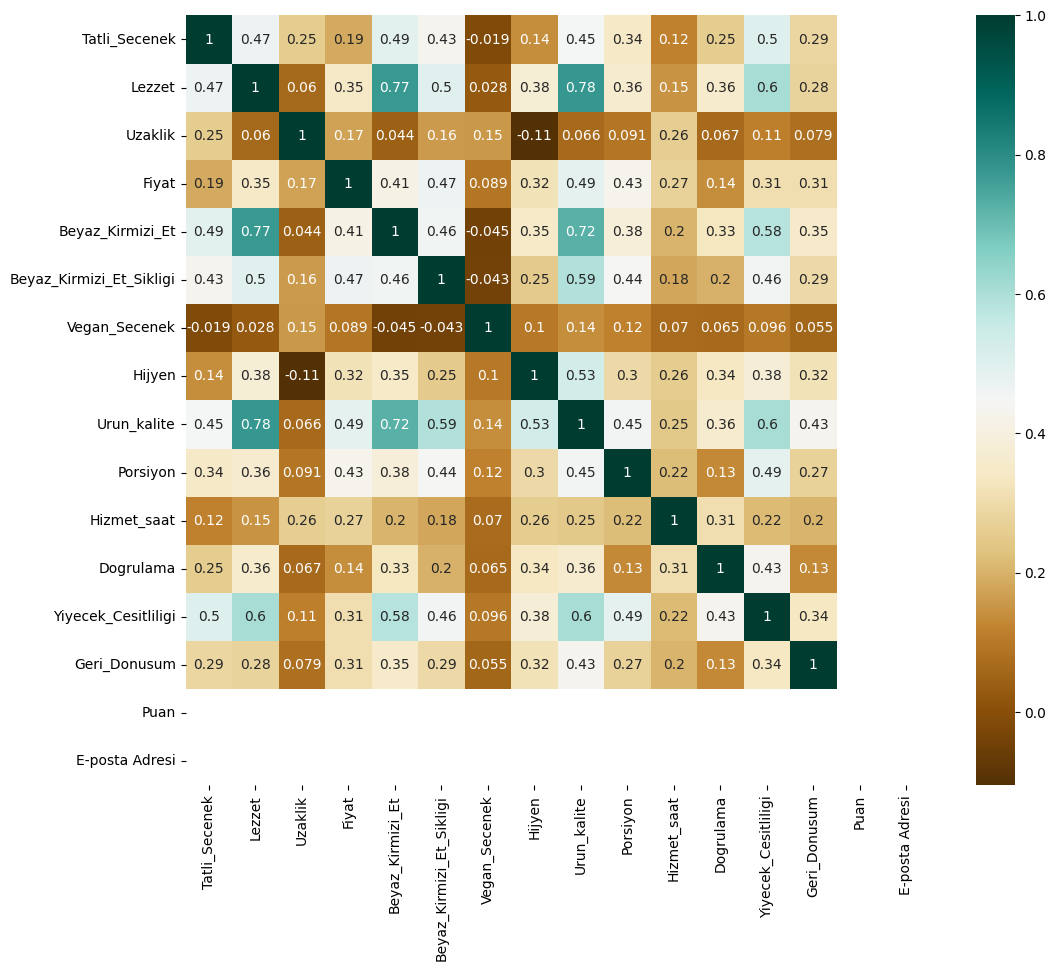

In [25]:
plt.figure(figsize=(12,10))
sicaklikYemek=df.corr()
sns.heatmap(sicaklikYemek,cmap="BrBG",annot=True)
sicaklikYemek

In [ ]:
## genel olarak urun_kalite ile lezzet arasında tercih yapılıyor

In [ ]:
ort=["Tatli_Secenek",	"Lezzet"	,"Uzaklik"	,"Fiyat"	,"Beyaz_Kirmizi_Et"	,"Beyaz_Kirmizi_Et_Sikligi"	,"Vegan_Secenek"	,"Hijyen",	"Urun_kalite"	,"Porsiyon",	"Hizmet_saat",	"Icecek_Cesitliligi", "Yiyecek_Cesitliligi","Geri_Donusum"]

In [28]:
avg_Tatli_Secenek=df["Tatli_Secenek"].mean()
avg_Lezzet=df["Lezzet"].mean()
avg_Uzaklik=df["Uzaklik"].mean()
avg_Fiyat=df["Fiyat"].mean()
avg_Beyaz_Kirmizi_Et=df["Beyaz_Kirmizi_Et"].mean()
avg_Beyaz_Kirmizi_Et_Sikligi=df["Beyaz_Kirmizi_Et_Sikligi"].mean()
avg_Vegan_Secenek=df["Vegan_Secenek"].mean()
avg_Hijyen=df["Hijyen"].mean()
avg_Urun_kalite=df["Urun_kalite"].mean()
avg_Porsiyon=df["Porsiyon"].mean()
avg_Hizmet_saat=df["Hizmet_saat"].mean()
avg_Icecek_Cesitliligi=df["Dogrulama"].mean()
avg_Yiyecek_Cesitliligi=df["Yiyecek_Cesitliligi"].mean()
avg_Geri_Donusum=df["Geri_Donusum"].mean()


In [29]:
ortalama_degerler=[avg_Tatli_Secenek,avg_Lezzet,avg_Uzaklik,avg_Fiyat,avg_Beyaz_Kirmizi_Et,avg_Beyaz_Kirmizi_Et_Sikligi,avg_Vegan_Secenek,avg_Hijyen,avg_Urun_kalite,avg_Porsiyon,avg_Hizmet_saat,avg_Icecek_Cesitliligi,avg_Yiyecek_Cesitliligi,avg_Geri_Donusum]

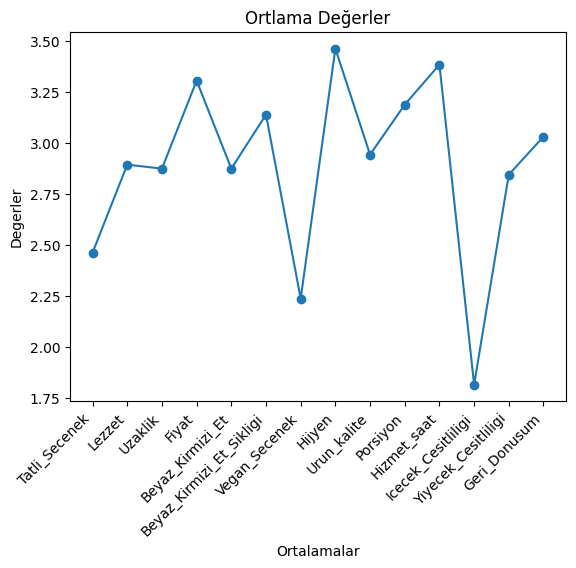

In [30]:
plt.plot(ort,ortalama_degerler,marker="o")
plt.xlabel("Ortalamalar", fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Degerler")
plt.title("Ortlama Değerler")
plt.show()

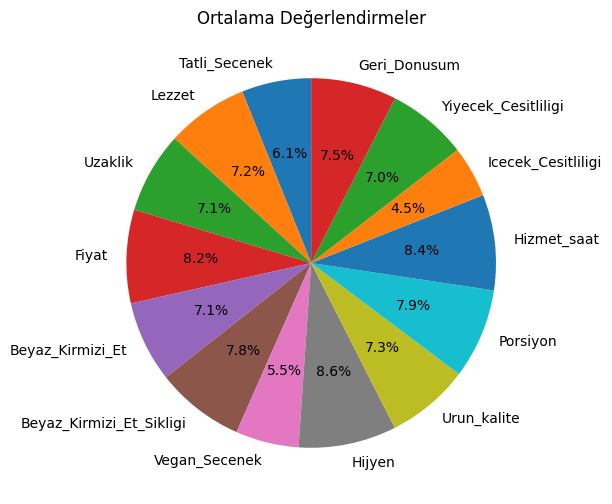

In [31]:
plt.figure(figsize=(10, 6))
plt.pie(ortalama_degerler, labels=ort, autopct='%1.1f%%', startangle=90)
plt.title('Ortalama Değerlendirmeler')
plt.show()


In [32]:
## yüksek ortalama değerlere karşılık gelir ve bu, genel olarak memnuniyetin yüksek olduğunu gösterebilir.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
## lineer regreresyon

R-squared (R²) Score: 0.46498866725748556
Mean Squared Error: 0.4828446948560562


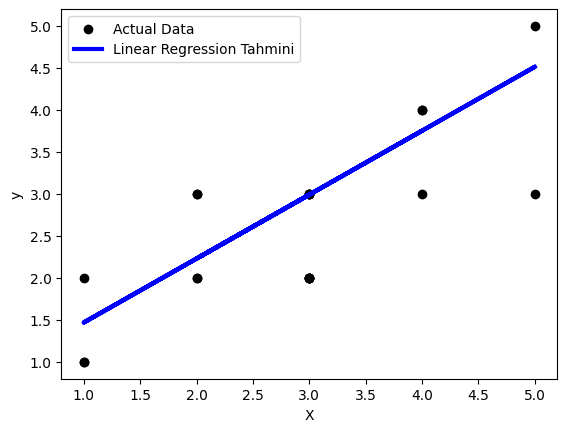

In [35]:
X = df['Urun_kalite']
y = df['Lezzet']

##X'i 2B diziye yeniden şekillendirme
X = X.values.reshape(-1, 1)
# Verileri eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  linear regression model
model = LinearRegression()

# model fit etme eylemi
model.fit(X_train, y_train)

# tahmin test datası
y_pred = model.predict(X_test)

#(R²) değerini hesaplama korelasyon
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

# model değerlendirme
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# sonuçlar
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear Regression Tahmini')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

R-squared (R²) Score: 0.4165718766600972
Mean Squared Error (Polynomial Regression): 0.5265405738985971


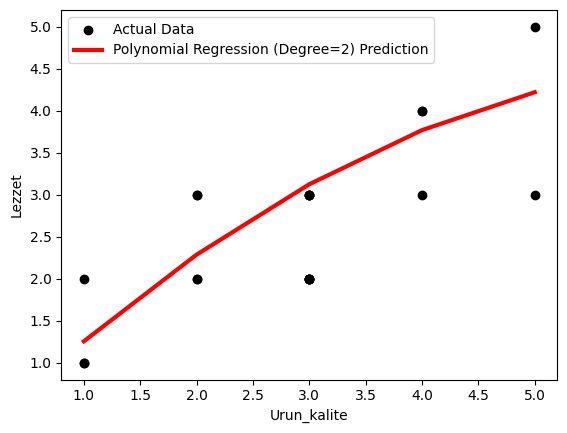

In [37]:
X = df['Urun_kalite'].values.reshape(-1, 1)
y = df['Lezzet']



# PolynomialFeatures kullanarak X'i dönüştürme
degree = 2  # Polinom derecesini ayarla
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Kendi özel regresyon modelini oluşturma
coefficients = np.polyfit(X_train.squeeze(), y_train, degree)
poly_model = np.poly1d(coefficients)

# Tahmin yapma
y_pred_poly = poly_model(X_test.squeeze())

#(R²) değerini hesaplama korelasyon
r2 = r2_score(y_test, y_pred_poly)
print("R-squared (R²) Score:", r2)

# Model değerlendirme
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')

# Sonuçları görselleştirme
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(np.sort(X_test.squeeze()), poly_model(np.sort(X_test.squeeze())), color='red', linewidth=3, label=f'Polynomial Regression (Degree={degree}) Prediction')
plt.xlabel('Urun_kalite')
plt.ylabel('Lezzet')
plt.legend()
plt.show()

In [38]:
from sklearn.linear_model import Ridge

R-squared (R²) Score: 0.4668809675982529
Mean Squared Error: 0.48113690452583974


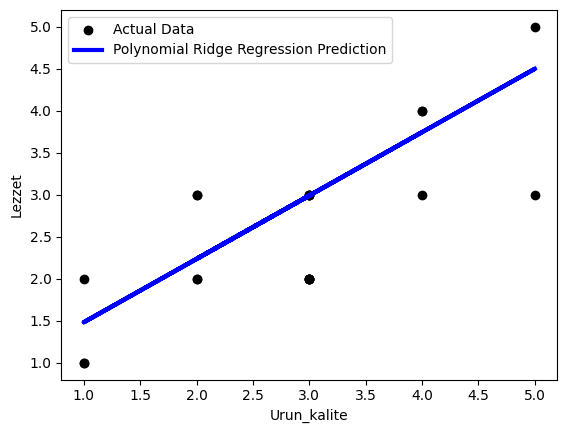

In [39]:
X_train_poly = X_train
X_test_poly = X_test

# Ridge regression modeli oluşturma
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)

# Modeli eğitme
ridge_model.fit(X_train_poly, y_train)

# Test verisi üzerinde tahmin yapma
y_predRidge = ridge_model.predict(X_test_poly)

#(R²) değerini hesaplama korelasyon
r2 = r2_score(y_test, y_predRidge)
print("R-squared (R²) Score:", r2)

# Model değerlendirme
mse = mean_squared_error(y_test, y_predRidge)
print(f'Mean Squared Error: {mse}')

# Sonuçları görselleştirme (isteğe bağlı)
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_predRidge, color='blue', linewidth=3, label='Polynomial Ridge Regression Prediction')
plt.xlabel('Urun_kalite')
plt.ylabel('Lezzet')
plt.legend()
plt.show()

In [40]:
from sklearn.linear_model import Lasso

R-squared (R²) Score: 0.478709215884198
Mean Squared Error: 0.47046197750133606


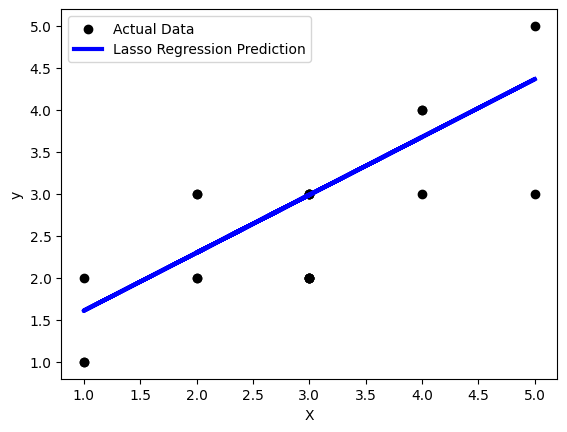

In [41]:
# Create a Lasso regression model
alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)

# Fit the model on the original features
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_predlasso = lasso_model.predict(X_test)

#(R²) değerini hesaplama korelasyon
r2 = r2_score(y_test, y_predlasso)
print("R-squared (R²) Score:", r2)

# Evaluate the model
mse = mean_squared_error(y_test, y_predlasso)
print(f'Mean Squared Error: {mse}')

# Visualize the results (optional)
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_predlasso, color='blue', linewidth=3, label='Lasso Regression Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

R-squared (R²) Score: 0.4775789011888003
Mean Squared Error: 0.47148208010625275


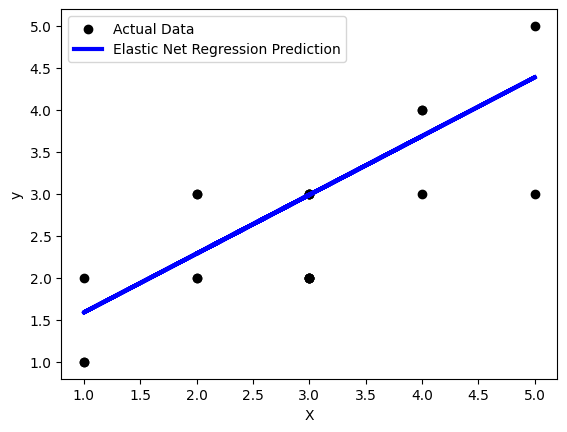

In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Elastik Net regresyon modeli oluşturma
alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Mixing parameter, 0 for L2 penalty, 1 for L1 penalty
elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Fit the model
elasticnet_model.fit(X_train, y_train)

# test data üzerinde tahmin
y_predElastic = elasticnet_model.predict(X_test)

# R-squared (R²) değerini hesaplama
r2 = r2_score(y_test, y_predElastic)
print("R-squared (R²) Score:", r2)

#model degerlendirme
mse = mean_squared_error(y_test, y_predElastic)
print(f'Mean Squared Error: {mse}')

# Görüntüleme
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_predElastic, color='blue', linewidth=3, label='Elastic Net Regression Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [50]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
#  veri kümesini yükleyin
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# R-squared (R²) değerini hesaplamak için bir fonksiyon oluşturun
def r2_score_custom(y_true, y_pred):
    return r2_score(y_true, y_pred)

#  Decision Tree oluştur
decision_tree_model = DecisionTreeRegressor()

# Çapraz doğrulama gerçekleştirme
cross_val_score = cross_val_score(decision_tree_model, X, y, cv=5, scoring=make_scorer(r2_score_custom))

# Her katlama için ortalama kare hatasını görüntüle
print("Cross-validated Mean Squared Errors:")
print(-cross_val_score)

print("Mean R-squared (R²) Score:", -cross_val_score.mean())



Cross-validated Mean Squared Errors:
[0.28276161 0.06106643 0.16822631 0.07683039 0.20605175]
Mean R-squared (R²) Score: 0.15898729784604826


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score



# Standart ölçeklendirmeyle bir SVR modeli oluşturun
svr_model = make_pipeline(StandardScaler(), SVR())

# Çapraz doğrulama gerçekleştirme
cross_val_scores = cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error')


# R-squared (R²) değerini hesaplamak için özel bir skorlama fonksiyonu oluşturun
def r2_score_custom(y_true, y_pred):
    return r2_score(y_true, y_pred)

# R-squared (R²) değerini hesaplayın
r2_scores = cross_val_score(svr_model, X, y, cv=5, scoring=make_scorer(r2_score_custom))

# R-squared (R²) değerlerini ekrana yazdırın
print("Cross-validated R-squared (R²) Skoru:")
print(r2_scores)

# Her katlama için ortalama kare hatasını görüntüle
print("Cross-validated Mean Squared Errors:")
print(-cross_val_scores)

# Tüm katlamalarda ortalama hatanın karesini görüntüle
print(f"Average Mean Squared Error: {np.mean(-cross_val_scores)}")


In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
tahmin = model.predict(X_test)
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.12      0.18         8
           3       0.47      0.88      0.61         8
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1

    accuracy                           0.48        21
   macro avg       0.29      0.40      0.32        21
weighted avg       0.37      0.48      0.38        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, tahmin))

[[0 2 0 0 0]
 [0 1 7 0 0]
 [0 0 7 1 0]
 [0 0 0 2 0]
 [0 0 1 0 0]]


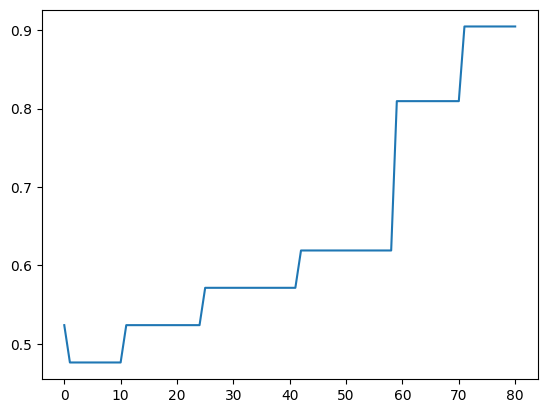

In [47]:
error_rates = []
for i in np.arange(1, 82):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    yeni_tahmin = new_model.predict(X_test)

    error_rates.append(np.mean(yeni_tahmin != y_test))
plt.plot(error_rates)

In [51]:

#  (tahmin) and actual values (y_test)
correlation_coefficient = np.corrcoef(y_test, tahmin)[0, 1]

# R-squared score
r_squared = r2_score(y_test, tahmin)

print("Correlation Katsayı:", correlation_coefficient)
print("R-squared Skoru:", r_squared)

Correlation Katsayı: 0.6564331821389479
R-squared Skoru: 0.2613065326633166


In [48]:
##Doğrusal Regresyon:
#Doğrusal regresyon, bağımlı değişken ile bağımsız değişken(ler) arasındaki ilişkiyi doğrusal bir denklemle modelleyen bir yöntemdir
#Polinom Regresyon:
#Polinom regresyonu, giriş değişkenlerinin polinom özelliklerini içeren doğrusal regresyonu genişletir.
#Ridge Regresyon:
#Ridge regresyon, doğrusal regresyon objektifine bir ceza terimi ekleyerek aşırı uydurmayı önleyen bir yöntemdir.
#LASSO Regresyon:
#LASSO (En Küçük Mutlak Büzülme ve Seçim Operatörü) regresyonu, bir ceza terimi ekleyen bir diğer regresyon türüdür, ancak L1 normunu kullanır.
#Elastic Net Regresyon:
#Elastic Net regresyonu, hem L1 hem de L2 düzenlemesini birleştirerek Ridge ve LASSO arasında bir denge sağlar.#
#Destek Vektör Regresyonu (SVR):
#Destek vektör regresyonu, değişkenler arasındaki ilişkiyi modellemek için destek vektör makinelerini kullanan bir regresyon tekniğidir.
#Doğrusal Regresyon: Basit doğrusal bir model.
#Polinom Regresyon: Doğrusal regresyonu polinom özellikleri ile genişletir.
#Ridge Regresyon: Doğrusal regresyona L2 düzenlemesi ekler.
#LASSO Regresyon: Doğrusal regresyona L1 düzenlemesi ekler.
#Elastic Net Regresyon: L1 ve L2 düzenlemelerini birleştirir.
#Destek Vektör Regresyonu (SVR): Doğrusal olmayan ilişkilerle başa çıkmak için kullanılır.
#KNN
#Sınıflandırılmış veriler, öğrencilere ilk K en yakın komşu problemlerini nasıl çözeceklerini öğretmek için kullanılan yaygın bir araçtır.
#K en yakın komşu modelini oluştururken veri kümenizi standartlaştırmak neden önemlidir?
#train_test_split işlevini kullanarak veri kümenizi eğitim verilerine ve test verilerine nasıl bölersiniz?
#İlk K en yakın komşu modelinizi nasıl eğitirsiniz ve onunla tahminler nasıl yapılır?
#K en yakın komşu modelinin performansı nasıl ölçülür?
#K en yakın komşu modelinde optimum K değerini seçmek için dirsek yöntemi nasıl kullanılır?


In [ ]:
#Lasso Regresyon: 0.4705
#Ridge Regresyon: 0.4811
#Support Vector Regression (SVR): 0.5249
#Polinom Regresyon: 0.5265
#Lineer Regresyon: 0.7038
#Decision Tree Based Regresyon: 6549.1572
#Bu durumda, Lasso Regresyon modeli en düşük MSE'ye sahiptir ve bu nedenle bu değerlendirmeye göre en iyi tahmin yeteneğine sahip olan modeldir. Ridge Regresyon ve SVR modelleri de oldukça iyi performans göstermektedir. Ancak, Decision Tree Based Regresyon modelinin yüksek MSE değeri, bu modelin kötü bir performans gösterdiğini gösterir.